In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [92]:
#read the data that is in a csv file format into a pandas dataframe.
stroke = pd.read_csv('stroke.csv')

In [93]:
#display the first 10 rows of the dataframe.
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [94]:
#display the dimensionality of the dataframe.
stroke.shape

(5110, 12)

In [95]:
#display information about the dataframe including the index dtype and columns, non-null values and memory usage.
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [96]:
#display descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and 
#shape of a dataset’s distribution, excluding NaN values.
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [97]:
#display the total number of missing values for each column.
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [98]:
#drop the rows with missing values from the dataframe.
stroke = stroke.dropna()
#Return dataframe with duplicate rows removed.
stroke = stroke.drop_duplicates()

In [99]:
#display the total number of missing values for each column after the modifications to tha dataframe.
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [100]:
#display the dimensionality of the dataframe after the modifications to tha dataframe.
stroke.shape

(4909, 12)

In [101]:
#display the distribution for a person having stroke and not having stroke.
class_counts = stroke['stroke'].value_counts()
print('Class distribution:')
print(class_counts)

Class distribution:
0    4700
1     209
Name: stroke, dtype: int64


In [102]:
#Encode target labels. To train or model we need non string values.
enc = LabelEncoder()
stroke[['gender','ever_married','work_type','Residence_type','smoking_status']] = stroke[['gender',
    'ever_married','work_type','Residence_type','smoking_status']].apply(enc.fit_transform)

In [103]:
#display the first 10 rows of the dataframe after encoding.
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1
10,12109,0,81.0,1,0,1,2,0,80.43,29.7,2,1
11,12095,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [104]:
#Compute pairwise correlation of columns.
stroke.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.007065,0.008984,0.001147,0.004016,0.016841,-0.022644,0.004978,0.006409,0.003084,0.018482,0.004839
gender,0.007065,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,0.008984,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.001147,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.004016,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,0.016841,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,-0.022644,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,0.004978,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.006409,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,0.003084,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374


<AxesSubplot:>

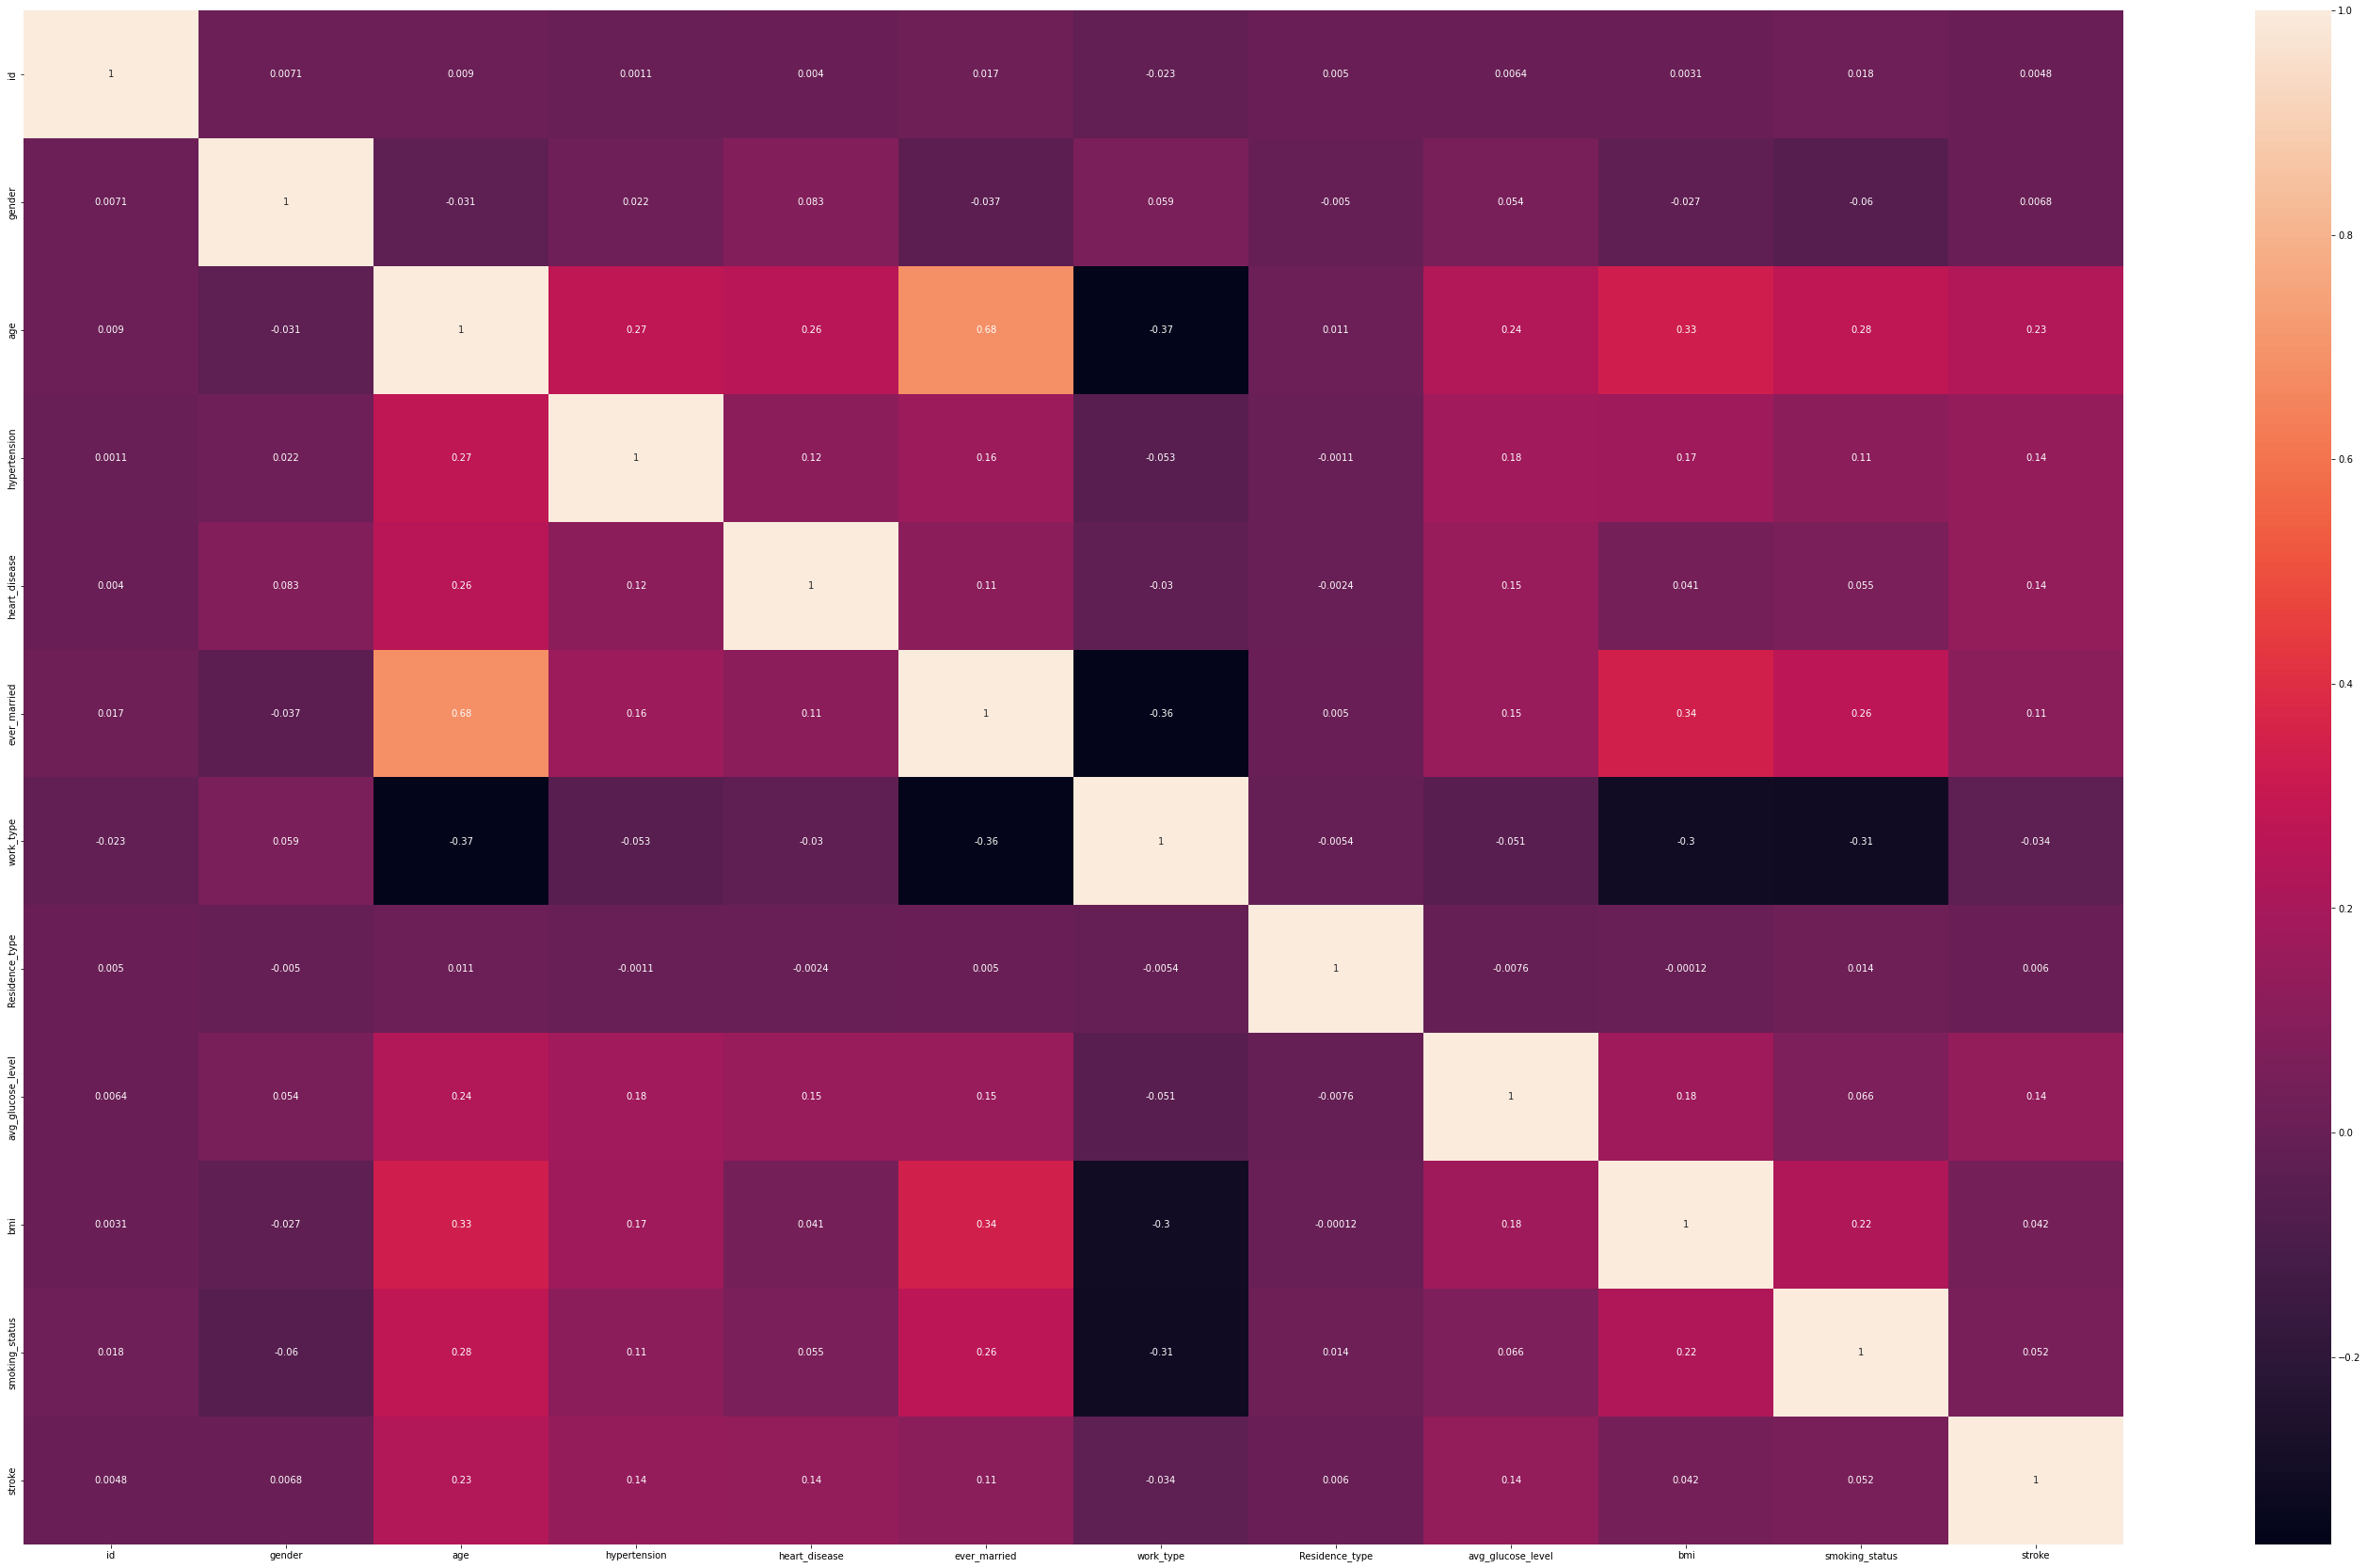

In [105]:
#a figure to see the pairwise correlation of colums.
plt.figure(figsize=(50,30))
sns.heatmap(stroke.corr(),annot=True)

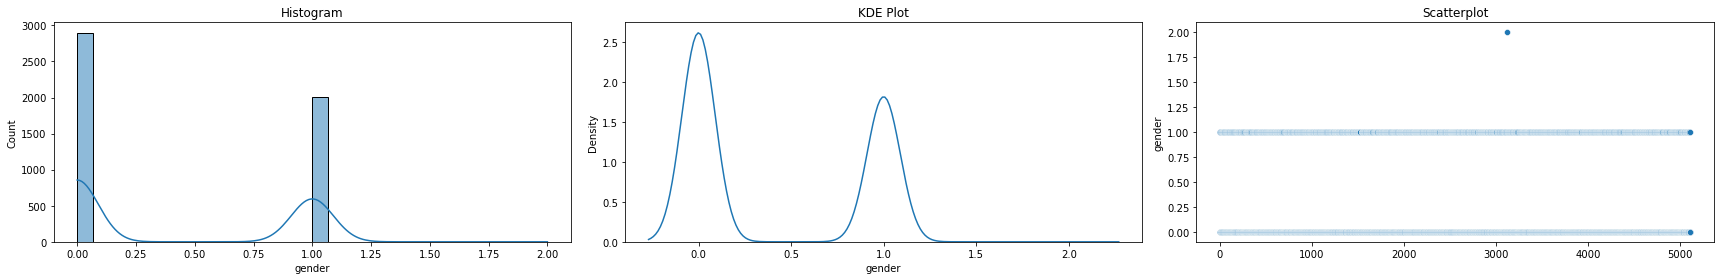

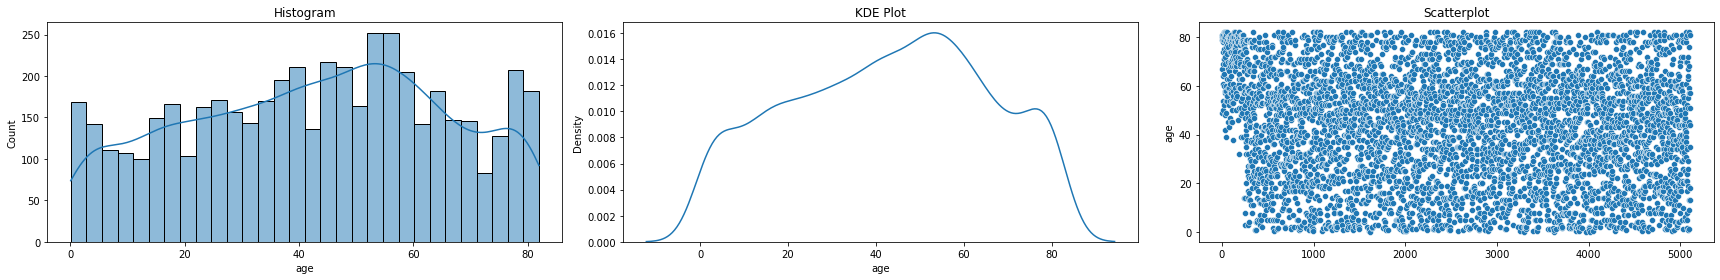

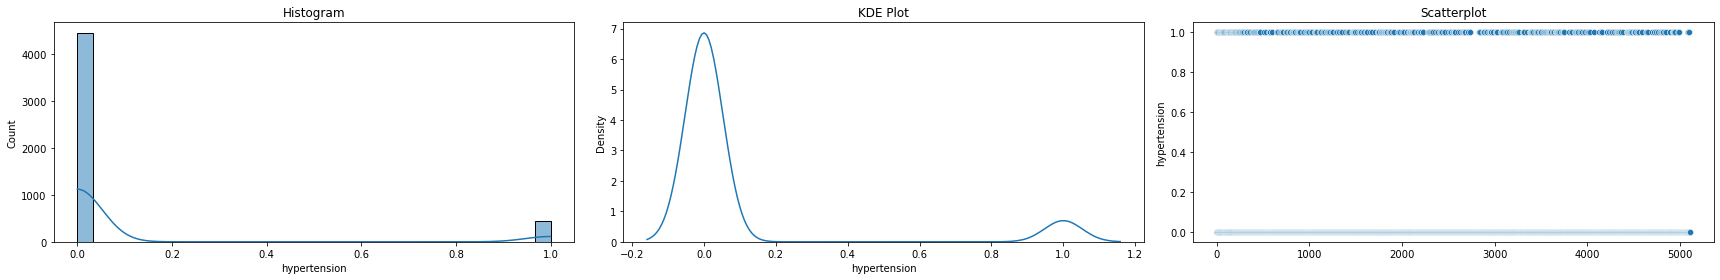

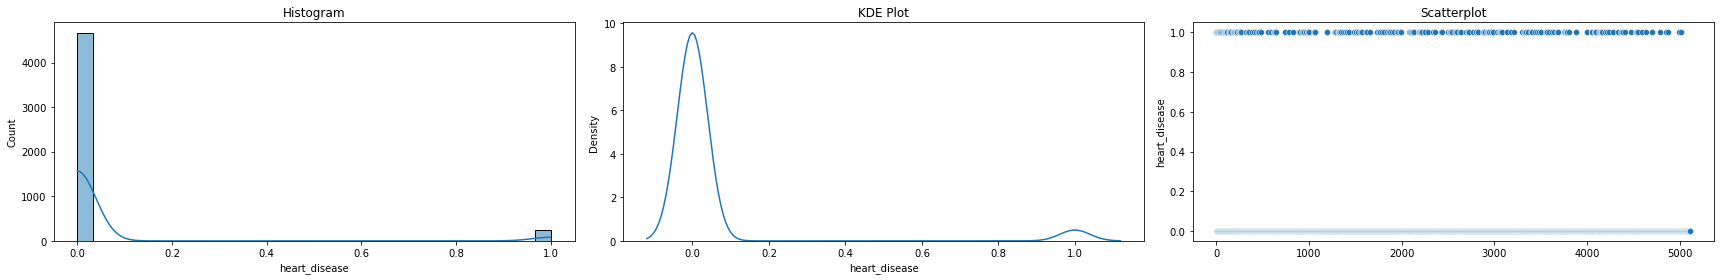

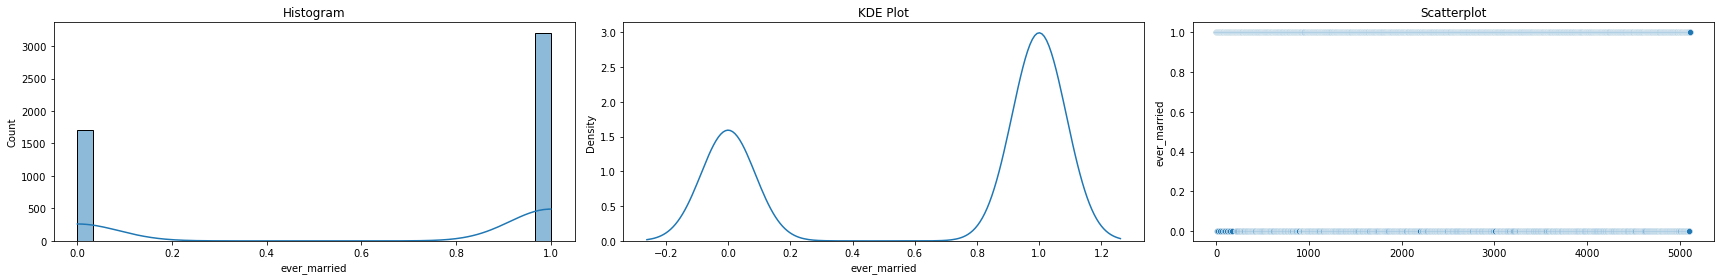

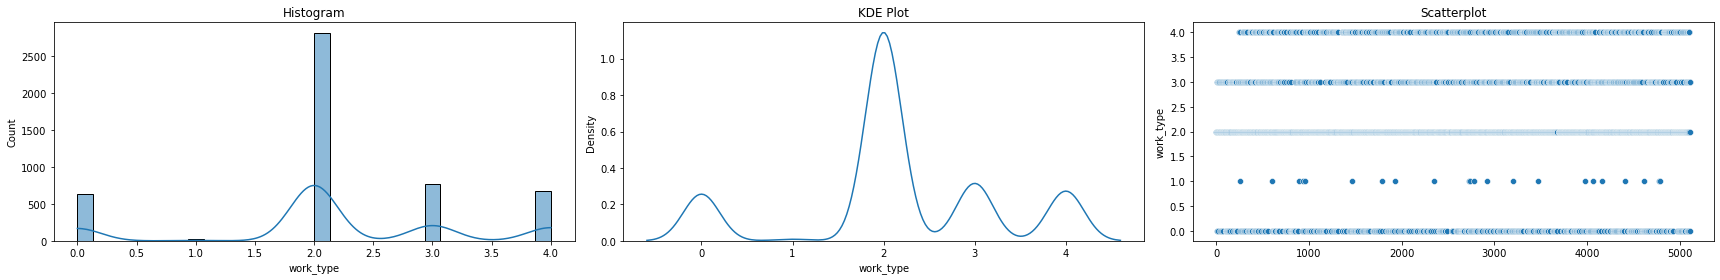

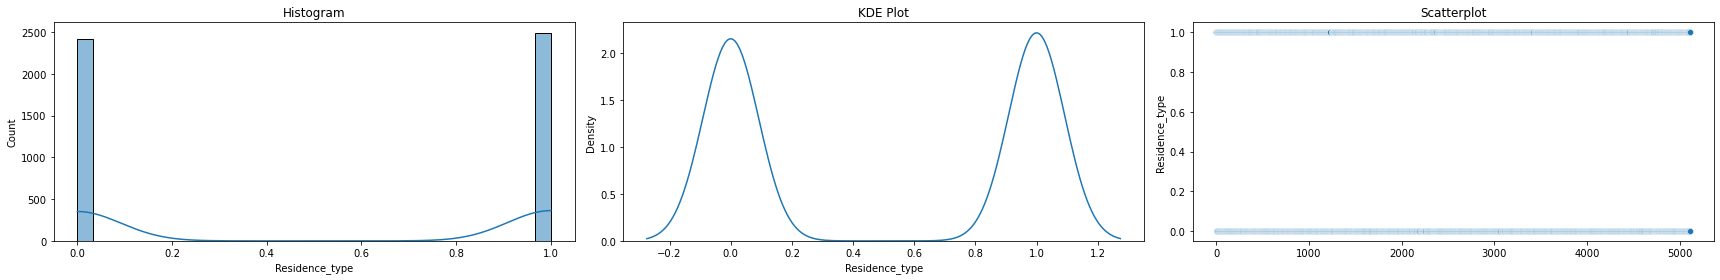

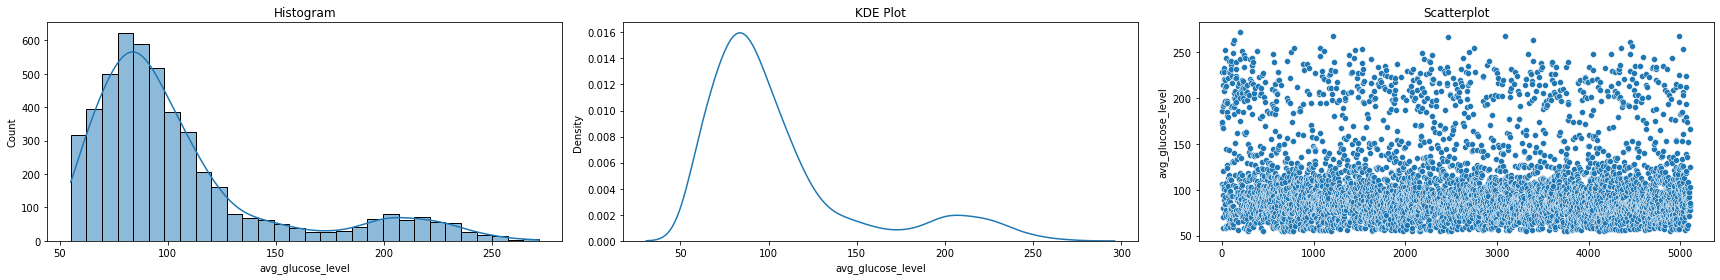

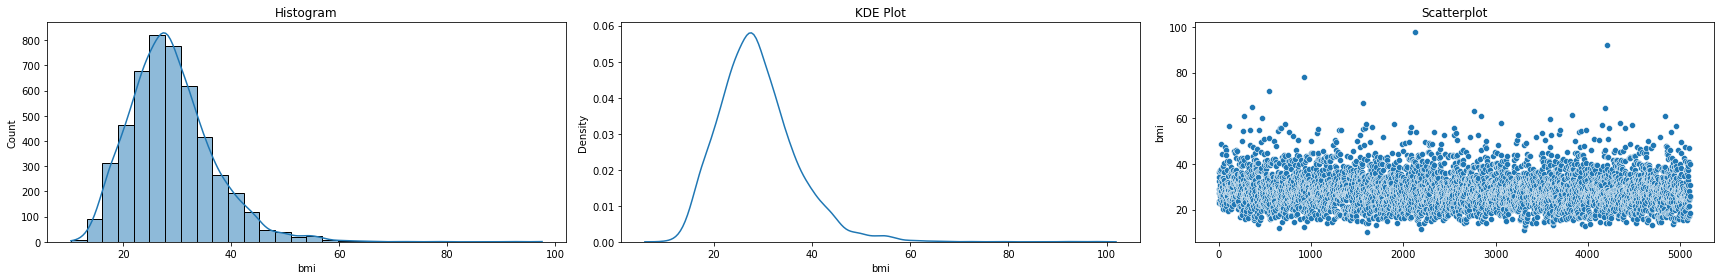

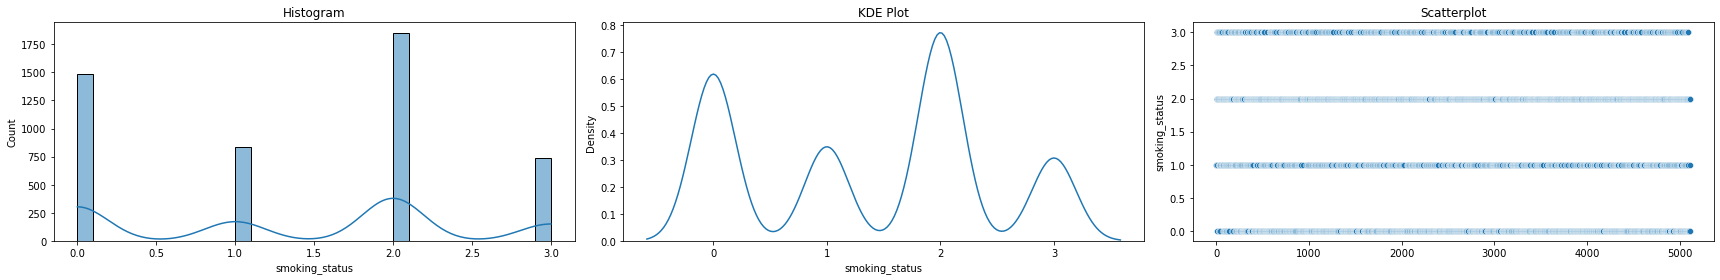

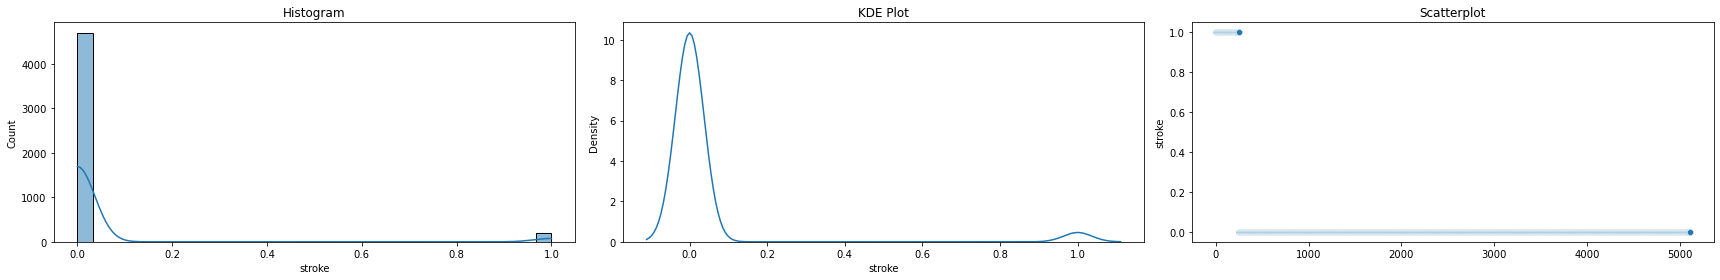

In [106]:
#plots for each column of the dataframe (not id) to understand the data set better.
def plots(stroke, column):
  fig, ax = plt.subplots(1, 3, figsize=(24, 4))
  # histogram
  sns.histplot(stroke[column], bins=30, kde=True, ax=ax[0])
  ax[0].set_title('Histogram')
  # KDE plot
  sns.kdeplot(stroke[column], ax=ax[1])
  ax[1].set_title('KDE Plot')
  # scatterplot
  sns.scatterplot(x=stroke.index, y=stroke[column], ax=ax[2])
  ax[2].set_title('Scatterplot')

  plt.tight_layout()
  plt.show()

for i in stroke.columns:
  if i != 'id':
    plots(stroke ,i)

In [107]:
#prepare the data set for training. 
X = stroke.drop(columns = ['id','stroke'])
Y = stroke['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [108]:
#create a decision tree classifier model.
model_dec_tree = DecisionTreeClassifier()
#train the model with our training data.
model_dec_tree.fit(X_train, Y_train)
#test the model with the test data and obtain predictions.
predictions = model_dec_tree.predict(X_test)
#get the accuracy score for the predictions.
score_dec_tree_one = accuracy_score(Y_test, predictions)
print("Accuracy of the model trained with the decision tree algorithm:",score_dec_tree_one)

Accuracy of the model trained with the decision tree algorithm: 0.9134419551934827


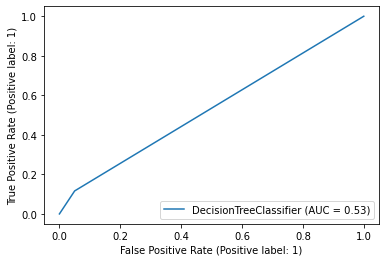

In [109]:
#plot a roc curve for our model.
plot_roc_curve(model_dec_tree, X_test, Y_test)
plt.show()

In [110]:
#create a gaussian naive bayes model.
model_gnb = GaussianNB()
#train the model with our training data.
model_gnb.fit(X_train, Y_train)
#test the model with the test data and obtain predictions.
pred = model_gnb.predict(X_test)
#print the accuracy score for the predictions.
print("Accuracy of the model trained with the naive bayes algorithm:",accuracy_score(Y_test, pred))

Accuracy of the model trained with the naive bayes algorithm: 0.8645621181262729


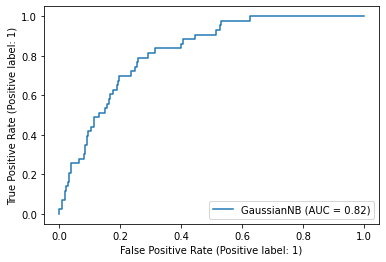

In [111]:
#plot a roc curve for our model.
plot_roc_curve(model_gnb, X_test, Y_test)
plt.show()

In [112]:
#create a random forest classifier model.
model_rfc = RandomForestClassifier(n_estimators=100)
#train the model with our training data.
model_rfc.fit(X_train,Y_train)
#test the model with the test data and obtain predictions.
y_pred=model_rfc.predict(X_test)
#print the accuracy score for the predictions.
print("Accuracy of the model trained with the random forest algorithm:",accuracy_score(Y_test, y_pred))

Accuracy of the model trained with the random forest algorithm: 0.955193482688391


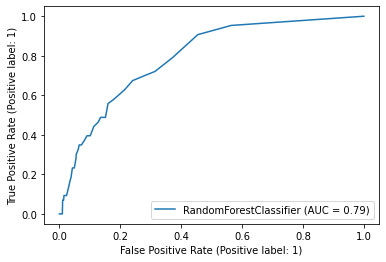

In [113]:
#plot a roc curve for our model.
plot_roc_curve(model_rfc, X_test, Y_test)
plt.show()